In [126]:
# ***Be sure to source setup.bash before launching jupyter server***
%matplotlib inline

import rospy
import rosbag
import numpy as np
import json
import os
import glob
import matplotlib.pyplot as plt

from custom_messages.msg import SimulationDataMsg

In [127]:
def point_to_numpy(point):
    return np.array([point.x, point.y, point.z])
def vec_to_numpy(vec):
    return point_to_numpy(vec)

In [240]:
experiment_defs_root = "defs"
experiment_gen_root = "gen"
specific_experiment_path = ['calibration_circuit_mirror.json'] # subbpath to only process 1 experiment dir or .json, not all at once
if len(specific_experiment_path) > 0:
    specific_experiment = os.path.join(*specific_experiment_path)


In [241]:
defs_paths = []
if len(specific_experiment_path) > 0 and specific_experiment.endswith('.json'):
    defs_paths = [[specific_experiment.split('.')[-2]]]
else:
    # walk recursively to find all .json defs
    if len(specific_experiment_path) > 0:
        walk_root = os.path.join(experiment_defs_root, specific_experiment)
    else:
        walk_root = experiment_defs_root
    for path, dirs, files in os.walk(walk_root):
        for f in files:
            if f.endswith('.json'):
                name = f.split('.')[0]
                defs_paths.append(path.split('/')[1:] + [name])

In [242]:
defs_paths

[['calibration_circuit_mirror']]

In [243]:
# each of the paths found in defs should also be under gen
# ie. defs/exp1/cam1.json => gen/exp1/cam1/runner_n/run_i

if len(specific_experiment_path) > 0:
    if specific_experiment.endswith('.json'):
        gens = os.path.join(experiment_gen_root, *specific_experiment_path[:-1])
    else:
        gens = os.path.join(experiment_gen_root, specific_experiment)
else:
    gens = experiment_gen_root
    
print(gens)


for experiment_path in defs_paths:
    print(experiment_path)
    gen_path = os.path.join(gens, os.path.join(*experiment_path))
    if os.path.isdir(gen_path):
        with open(os.path.join(experiment_defs_root, os.path.join(*experiment_path)) + ".json") as f:
            exp_config = json.load(f)
        
        
        # collect all .bag files!
        bag_files = []
        for path, dirs, files in os.walk(gen_path):
            for f in files:
                if f.endswith('.bag'):
                    bag_file_path = os.path.join(path, f)
                    bag_files.append(bag_file_path)
        
        
        print(bag_files)
    else:
        print("{0} is not generated!".format(gen_path))

gen
['calibration_circuit_mirror']
['gen/calibration_circuit_mirror/runner_0/run_0/sim_data.bag']


In [244]:
def process_bag_files(bag_files_paths):
    for path in bag_files_paths:
        bag = rosbag.Bag(path)
        print(bag)

In [245]:
bag = rosbag.Bag(bag_files[0])
print(bag)

path:        gen/calibration_circuit_mirror/runner_0/run_0/sim_data.bag
version:     2.0
duration:    55.1s
start:       May 18 2018 17:41:01.64 (1526661661.64)
end:         May 18 2018 17:41:56.79 (1526661716.79)
size:        2.1 MB
messages:    1317
compression: none [3/3 chunks]
types:       custom_messages/SimulationDataMsg [5ef8d61c754a72cf988de94e1339fce9]
topics:      /simulation_data   1317 msgs @ 25.0 Hz : custom_messages/SimulationDataMsg


In [246]:
for i, msg in enumerate(bag):
    print(msg)
    if i < 1000:
        continue

BagMessage(topic='/simulation_data', message=header: 
  seq: 1
  stamp: 
    secs: 64
    nsecs:  60000000
  frame_id: "map"
true_odom: 
  header: 
    seq: 747
    stamp: 
      secs: 63
      nsecs: 994000000
    frame_id: "map"
  child_frame_id: "base_link"
  pose: 
    pose: 
      position: 
        x: 0.493964672633
        y: -0.00341608635875
        z: 0.00537598401918
      orientation: 
        x: 7.58937733017e-07
        y: 0.000379675510078
        z: -0.00369770646561
        w: 0.999993091383
    covariance: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
  twist: 
    twist: 
      linear: 
        x: 1.93983458921
        y: -0.0150205091522
        z: -0.000613358044054
      angular: 
        x: 2.07230550402e-05
        y: -0.00530747507081
        z: -0.0840329509432
    covariance: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

  path_curvature: 0.0, timestamp=rospy.Time[1526661664071749925])
BagMessage(topic='/simulation_data', message=header: 
  seq: 59
  stamp: 
    secs: 68
    nsecs: 902000000
  frame_id: "map"
true_odom: 
  header: 
    seq: 1233
    stamp: 
      secs: 68
      nsecs: 854000000
    frame_id: "map"
  child_frame_id: "base_link"
  pose: 
    pose: 
      position: 
        x: 54.8937309357
        y: -0.0789787610472
        z: 0.00540555092893
      orientation: 
        x: -6.43272952852e-07
        y: 0.000386226178939
        z: -0.000849666775442
        w: 0.999999564448
    covariance: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
  twist: 
    twist: 
      linear: 
        x: 20.1579121429
        y: -0.0489880475988
        z: 0.000480021188422
      angular: 
        x: -3.37527246478e-05
        y: -0.00373568632671
        z: -0.0888136724025

BagMessage(topic='/simulation_data', message=header: 
  seq: 108
  stamp: 
    secs: 71
    nsecs: 740000000
  frame_id: "map"
true_odom: 
  header: 
    seq: 1520
    stamp: 
      secs: 71
      nsecs: 724000000
    frame_id: "map"
  child_frame_id: "base_link"
  pose: 
    pose: 
      position: 
        x: 112.200438944
        y: -0.255338743993
        z: 0.00541118080589
      orientation: 
        x: -1.63523794816e-07
        y: 0.000385926758852
        z: -0.00121803971953
        w: 0.99999918372
    covariance: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
  twist: 
    twist: 
      linear: 
        x: 19.9657419644
        y: -0.0674962981086
        z: -0.00044538263036
      angular: 
        x: 8.86320552833e-05
        y: -0.00335014641169
        z: 0.0893504419636
    covariance: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

BagMessage(topic='/simulation_data', message=header: 
  seq: 183
  stamp: 
    secs: 77
    nsecs: 222000000
  frame_id: "map"
true_odom: 
  header: 
    seq: 2066
    stamp: 
      secs: 77
      nsecs: 184000000
    frame_id: "map"
  child_frame_id: "base_link"
  pose: 
    pose: 
      position: 
        x: 221.223838573
        y: -0.76214002651
        z: 0.00541085723032
      orientation: 
        x: 2.17919109708e-07
        y: 0.000386023134302
        z: -0.00147586573897
        w: 0.999998836403
    covariance: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
  twist: 
    twist: 
      linear: 
        x: 19.9638237105
        y: -0.077486431451
        z: -0.000426684616339
      angular: 
        x: 0.000115620071187
        y: -0.00336697493143
        z: 0.0910975150471
    covariance: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

BagMessage(topic='/simulation_data', message=header: 
  seq: 207
  stamp: 
    secs: 79
    nsecs:  56000000
  frame_id: "map"
true_odom: 
  header: 
    seq: 2253
    stamp: 
      secs: 79
      nsecs:  54000000
    frame_id: "map"
  child_frame_id: "base_link"
  pose: 
    pose: 
      position: 
        x: 258.558210884
        y: -0.906211366467
        z: 0.0054103433508
      orientation: 
        x: -7.54899899193e-07
        y: 0.000385908088385
        z: -0.00180202840742
        w: 0.999998301883
    covariance: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
  twist: 
    twist: 
      linear: 
        x: 19.9641616782
        y: -0.0848908287448
        z: -0.00045402691717
      angular: 
        x: -6.15341052135e-05
        y: -0.00339930574955
        z: -0.0906709766755
    covariance: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

BagMessage(topic='/simulation_data', message=header: 
  seq: 266
  stamp: 
    secs: 84
    nsecs: 254000000
  frame_id: "map"
true_odom: 
  header: 
    seq: 2766
    stamp: 
      secs: 84
      nsecs: 184000000
    frame_id: "map"
  child_frame_id: "base_link"
  pose: 
    pose: 
      position: 
        x: 359.983360762
        y: -1.33379288079
        z: 0.00545578532932
      orientation: 
        x: 6.83258666823e-07
        y: 0.000397823592318
        z: -0.00182007961815
        w: 0.999998264522
    covariance: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
  twist: 
    twist: 
      linear: 
        x: 17.8131254158
        y: -0.0869805442866
        z: -0.000461686444917
      angular: 
        x: 0.000127123045725
        y: 0.00128883747083
        z: 0.0887530842388
    covariance: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

  path_curvature: 0.0, timestamp=rospy.Time[1526661673607603073])
BagMessage(topic='/simulation_data', message=header: 
  seq: 293
  stamp: 
    secs: 86
    nsecs: 430000000
  frame_id: "map"
true_odom: 
  header: 
    seq: 2987
    stamp: 
      secs: 86
      nsecs: 394000000
    frame_id: "map"
  child_frame_id: "base_link"
  pose: 
    pose: 
      position: 
        x: 395.310611154
        y: -1.4509986262
        z: 0.00540455297361
      orientation: 
        x: -4.9054593845e-07
        y: 0.000385411614707
        z: -0.00107875959279
        w: 0.999999343867
    covariance: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
  twist: 
    twist: 
      linear: 
        x: 13.9510748372
        y: -0.040114888737
        z: -0.000405607388557
      angular: 
        x: -9.53202493317e-06
        y: -0.00363846162191
        z: -0.0889535721649
   

  path_curvature: 0.0, timestamp=rospy.Time[1526661676791745901])
BagMessage(topic='/simulation_data', message=header: 
  seq: 371
  stamp: 
    secs: 92
    nsecs: 752000000
  frame_id: "map"
true_odom: 
  header: 
    seq: 3620
    stamp: 
      secs: 92
      nsecs: 724000000
    frame_id: "map"
  child_frame_id: "base_link"
  pose: 
    pose: 
      position: 
        x: 424.725513136
        y: -69.0942671058
        z: 0.00537771265993
      orientation: 
        x: 0.000235884888633
        y: 0.000322615345894
        z: -0.684248899392
        w: 0.729248437748
    covariance: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
  twist: 
    twist: 
      linear: 
        x: 1.26184843736
        y: -19.9726249983
        z: -0.00130143900486
      angular: 
        x: -0.00621575429686
        y: 0.00239101658747
        z: -0.0959680690749
    cova

  path_curvature: 0.0, timestamp=rospy.Time[1526661677640301942])
BagMessage(topic='/simulation_data', message=header: 
  seq: 392
  stamp: 
    secs: 94
    nsecs: 476000000
  frame_id: "map"
true_odom: 
  header: 
    seq: 3792
    stamp: 
      secs: 94
      nsecs: 444000000
    frame_id: "map"
  child_frame_id: "base_link"
  pose: 
    pose: 
      position: 
        x: 424.761998727
        y: -103.420256544
        z: 0.00541142269997
      orientation: 
        x: 0.000271909315566
        y: 0.000274152367002
        z: -0.707493074867
        w: 0.706720170874
    covariance: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
  twist: 
    twist: 
      linear: 
        x: -0.0418080112
        y: -19.9704970929
        z: -0.000416991150636
      angular: 
        x: -0.00330626823704
        y: 1.81200135386e-05
        z: 0.0858446928246
    cov

BagMessage(topic='/simulation_data', message=header: 
  seq: 507
  stamp: 
    secs: 103
    nsecs: 758000000
  frame_id: "map"
true_odom: 
  header: 
    seq: 4720
    stamp: 
      secs: 103
      nsecs: 724000000
    frame_id: "map"
  child_frame_id: "base_link"
  pose: 
    pose: 
      position: 
        x: 424.520721527
        y: -288.727826172
        z: 0.00541083628834
      orientation: 
        x: 0.000272822913586
        y: 0.000272934311016
        z: -0.706386518126
        w: 0.70782620613
    covariance: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
  twist: 
    twist: 
      linear: 
        x: 0.0228143629311
        y: -19.9682380768
        z: -0.000454036637304
      angular: 
        x: -0.00338253953512
        y: -0.000208437748161
        z: 0.0934151212719
    covariance: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

  path_curvature: 0.0, timestamp=rospy.Time[1526661682824594020])
BagMessage(topic='/simulation_data', message=header: 
  seq: 515
  stamp: 
    secs: 104
    nsecs: 312000000
  frame_id: "map"
true_odom: 
  header: 
    seq: 4776
    stamp: 
      secs: 104
      nsecs: 284000000
    frame_id: "map"
  child_frame_id: "base_link"
  pose: 
    pose: 
      position: 
        x: 424.543888739
        y: -299.909498021
        z: 0.00541113133133
      orientation: 
        x: 0.000271153209989
        y: 0.000274685196722
        z: -0.706022845946
        w: 0.708188952206
    covariance: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
  twist: 
    twist: 
      linear: 
        x: 0.0416213760164
        y: -19.9657876506
        z: -0.000442452333302
      angular: 
        x: -0.00336854257989
        y: -3.3040333689e-06
        z: 0.0855810722438
   

  path_curvature: 0.0, timestamp=rospy.Time[1526661687512115955])
BagMessage(topic='/simulation_data', message=header: 
  seq: 630
  stamp: 
    secs: 112
    nsecs: 628000000
  frame_id: "map"
true_odom: 
  header: 
    seq: 5605
    stamp: 
      secs: 112
      nsecs: 574000000
    frame_id: "map"
  child_frame_id: "base_link"
  pose: 
    pose: 
      position: 
        x: 424.603193901
        y: -426.766429764
        z: 0.00548251551717
      orientation: 
        x: 0.000280109761026
        y: 0.000281090034396
        z: -0.707184096657
        w: 0.707029345899
    covariance: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
  twist: 
    twist: 
      linear: 
        x: -0.000848420885667
        y: -3.45973069765
        z: 8.4503234844e-05
      angular: 
        x: 0.000644402123164
        y: 5.25542417808e-06
        z: -0.0831385033568
 

BagMessage(topic='/simulation_data', message=header: 
  seq: 769
  stamp: 
    secs: 124
    nsecs: 404000000
  frame_id: "map"
true_odom: 
  header: 
    seq: 6784
    stamp: 
      secs: 124
      nsecs: 364000000
    frame_id: "map"
  child_frame_id: "base_link"
  pose: 
    pose: 
      position: 
        x: 307.96451044
        y: -431.507385441
        z: 0.00541127700938
      orientation: 
        x: 0.000385874410795
        y: 4.01623407286e-06
        z: -0.999999088869
        w: 0.00129357879036
    covariance: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
  twist: 
    twist: 
      linear: 
        x: -19.9619093496
        y: -0.0470836714706
        z: -0.000455029364788
      angular: 
        x: 0.000212187811296
        y: 0.00342986260064
        z: -0.0956552888788
    covariance: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

BagMessage(topic='/simulation_data', message=header: 
  seq: 889
  stamp: 
    secs: 134
    nsecs: 100000000
  frame_id: "map"
true_odom: 
  header: 
    seq: 7755
    stamp: 
      secs: 134
      nsecs:  74000000
    frame_id: "map"
  child_frame_id: "base_link"
  pose: 
    pose: 
      position: 
        x: 114.06481675
        y: -431.213461096
        z: 0.00540720925507
      orientation: 
        x: 0.000385577002893
        y: -3.95172886577e-08
        z: -0.999999612657
        w: -0.000791211563269
    covariance: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
  twist: 
    twist: 
      linear: 
        x: -19.9766767729
        y: 0.0502002707563
        z: -0.000502239259143
      angular: 
        x: -0.000123008236957
        y: 0.00365392751709
        z: 0.0912447836484
    covariance: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

BagMessage(topic='/simulation_data', message=header: 
  seq: 1016
  stamp: 
    secs: 144
    nsecs: 418000000
  frame_id: "map"
true_odom: 
  header: 
    seq: 8785
    stamp: 
      secs: 144
      nsecs: 374000000
    frame_id: "map"
  child_frame_id: "base_link"
  pose: 
    pose: 
      position: 
        x: -54.0957720056
        y: -415.939866888
        z: 0.00542216435012
      orientation: 
        x: 0.000364123232641
        y: -0.000170157248531
        z: -0.827025483791
        w: -0.562164288818
    covariance: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
  twist: 
    twist: 
      linear: 
        x: -4.6662845485
        y: 11.5797985992
        z: -0.00154451769846
      angular: 
        x: 0.00628034772498
        y: -0.0005713352985
        z: -0.275691937753
    covariance: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [253]:
def extract_velocity_profiles(bag, straight_speed=20.0, radius_speed_mult=0.5):
    time_axis = []
    target_speeds = []
    actual_speeds = []
    ekf_speeds = []
    curvature_speeds = []
    for msg in bag:
        if msg.message is None:
            print(msg)
            continue
        msg = msg.message
        time_axis.append(msg.header.stamp.to_sec())
        target_speeds.append(msg.path_update.velocity_controller_target)
        actual_speeds.append(np.linalg.norm(vec_to_numpy(msg.true_odom.twist.twist.linear)))
        ekf_speeds.append(np.linalg.norm(vec_to_numpy(msg.ekf_odom.twist.twist.linear)))
        curvature = np.abs(msg.path_update.path_curvature)
        if curvature == 0.0:
            curvature_speeds.append(straight_speed)
        else:
            curvature_speeds.append(min(straight_speed, radius_speed_mult/curvature))
    return time_axis, target_speeds, actual_speeds, ekf_speeds, curvature_speeds

In [254]:
times, target, actual, ekf, curvature_speeds = extract_velocity_profiles(bag)

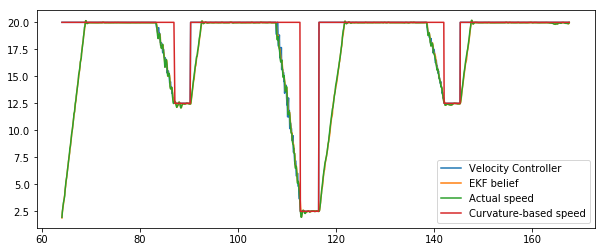

In [255]:
plt.figure(figsize=(10,4))
_ = plt.plot(times, np.vstack([target, ekf, actual, curvature_speeds]).T)
plt.legend(("Velocity Controller", "EKF belief","Actual speed", "Curvature-based speed"))

In [256]:
def extract_crosstrack_error(bag):
    time_axis = []
    true_errors = []
    believed_errors = []
    curvature = []
    for msg in bag:
    
        msg = msg.message
        time_axis.append(msg.header.stamp.to_sec())
        target_point = vec_to_numpy(msg.path_update.target_point)
        believed_pos = point_to_numpy(msg.ekf_odom.pose.pose.position)
        actual_pos = point_to_numpy(msg.true_odom.pose.pose.position)
        
        # since the exactly distance appears to be very unreliable (timing mismatch during data recording => record path target point from a different timestep as current point)
        # compute crosstrack distance here         
        normal = vec_to_numpy(msg.path_update.path_normal)
        diff_believed = believed_pos - target_point
        diff_actual = actual_pos - target_point
        # project onto normal
        true_errors.append(np.dot(normal, diff_actual))
        believed_errors.append(np.dot(normal, diff_believed))
        
        curvature.append(np.abs(msg.path_update.path_curvature))

        
    return np.array(time_axis), np.array(true_errors), np.array(believed_errors), np.array(curvature)

In [257]:
times, true_errors, believed_errors, curvatures = extract_crosstrack_error(bag)
radii = np.array([None if c == 0.0 else 0.1/c for c in curvatures])

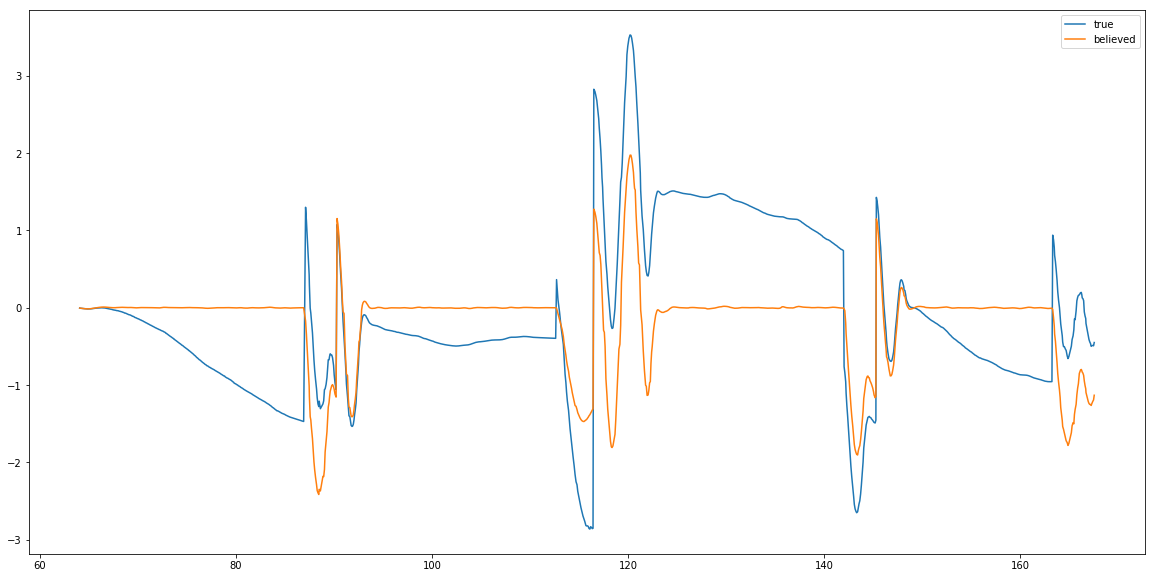

In [261]:
plt.figure(figsize=(20,10))
_ = plt.plot(times, np.vstack([true_errors, believed_errors]).T)
plt.legend(("true", "believed"))